In [ ]:
import gym
#print(gym.__version__)

In [ ]:
gym.envs.register(
    id='FrozenLakeNotSlippery-v0',
    entry_point='gym.envs.toy_text:FrozenLakeEnv',
    kwargs={'map_name' : '4x4', 'is_slippery': False},
    max_episode_steps=100,
    reward_threshold=0.74
)

In [ ]:
# Create the gridworld-like environment
env=gym.make('FrozenLakeNotSlippery-v0', render_mode='rgb_array')
# Let's look at the model of the environment (i.e., P):
# Question: what is the data in this structure saying? Relate this to the course
'''
Ans: Data in this structure records the Markov decision process, including {state: {action: [(probability, next_state, reward, done)]}}.
'''
# presentation of P
env.env.P

{0: {0: [(1.0, 0, 0.0, False)],
  1: [(1.0, 4, 0.0, False)],
  2: [(1.0, 1, 0.0, False)],
  3: [(1.0, 0, 0.0, False)]},
 1: {0: [(1.0, 0, 0.0, False)],
  1: [(1.0, 5, 0.0, True)],
  2: [(1.0, 2, 0.0, False)],
  3: [(1.0, 1, 0.0, False)]},
 2: {0: [(1.0, 1, 0.0, False)],
  1: [(1.0, 6, 0.0, False)],
  2: [(1.0, 3, 0.0, False)],
  3: [(1.0, 2, 0.0, False)]},
 3: {0: [(1.0, 2, 0.0, False)],
  1: [(1.0, 7, 0.0, True)],
  2: [(1.0, 3, 0.0, False)],
  3: [(1.0, 3, 0.0, False)]},
 4: {0: [(1.0, 4, 0.0, False)],
  1: [(1.0, 8, 0.0, False)],
  2: [(1.0, 5, 0.0, True)],
  3: [(1.0, 0, 0.0, False)]},
 5: {0: [(1.0, 5, 0, True)],
  1: [(1.0, 5, 0, True)],
  2: [(1.0, 5, 0, True)],
  3: [(1.0, 5, 0, True)]},
 6: {0: [(1.0, 5, 0.0, True)],
  1: [(1.0, 10, 0.0, False)],
  2: [(1.0, 7, 0.0, True)],
  3: [(1.0, 2, 0.0, False)]},
 7: {0: [(1.0, 7, 0, True)],
  1: [(1.0, 7, 0, True)],
  2: [(1.0, 7, 0, True)],
  3: [(1.0, 7, 0, True)]},
 8: {0: [(1.0, 8, 0.0, False)],
  1: [(1.0, 12, 0.0, True)],
  2: [(

In [ ]:
# Now let's investigate the observation space (i.e., S using our nomenclature),
# and confirm we see it is a discrete space with 16 locations
print(env.observation_space)

Discrete(16)


In [ ]:
stateSpaceSize = env.observation_space.n
print(stateSpaceSize)

16


In [ ]:
# Now let's investigate the action space (i.e., A) for the agent->environment
# channel
print(env.action_space)

Discrete(4)


In [ ]:
actionSpaceSize = env.action_space.n
print(actionSpaceSize)

4


In [ ]:
# The gym environment has ...sample() functions that allow us to sample
# from the above spaces:
for g in range(1,10,1):
  print("sample from S:",env.observation_space.sample()," ... ","sample from A:",env.action_space.sample())

sample from S: 13  ...  sample from A: 2
sample from S: 9  ...  sample from A: 1
sample from S: 6  ...  sample from A: 3
sample from S: 9  ...  sample from A: 3
sample from S: 11  ...  sample from A: 0
sample from S: 0  ...  sample from A: 0
sample from S: 10  ...  sample from A: 3
sample from S: 5  ...  sample from A: 1
sample from S: 6  ...  sample from A: 1


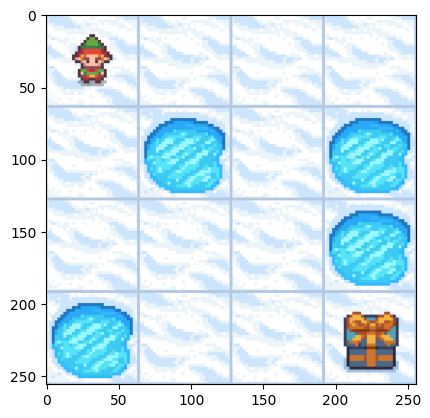

In [ ]:
# The enviroment also provides a helper to render (visualize) the environment
import matplotlib.pyplot as plt

env.reset()
img = env.render()
img = img[0]
plt.imshow(img)

Enter the action as an integer from 0 to 4  (or exit): 
1
--> The result of taking action 1 is:
     S= 4
     R= 0.0
     p= {'prob': 1.0}


/usr/local/lib/python3.11/dist-packages/gym/utils/passive_env_checker.py:241: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


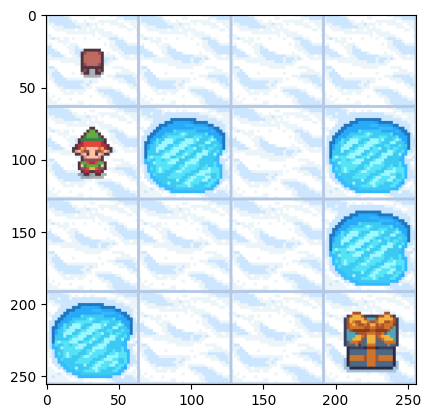

Enter the action as an integer from 0 to 4  (or exit): 
1
--> The result of taking action 1 is:
     S= 8
     R= 0.0
     p= {'prob': 1.0}


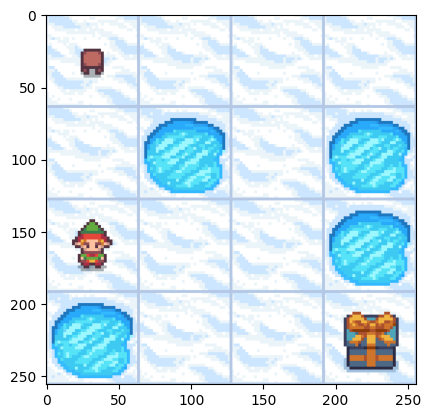

Enter the action as an integer from 0 to 4  (or exit): 
2
--> The result of taking action 2 is:
     S= 9
     R= 0.0
     p= {'prob': 1.0}


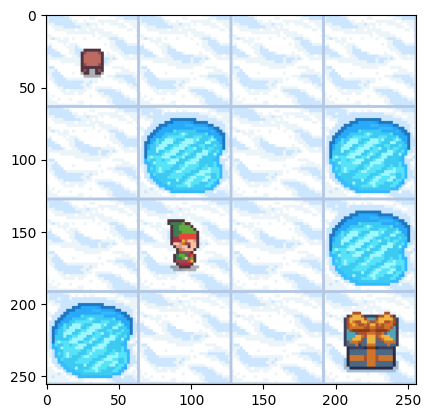

Enter the action as an integer from 0 to 4  (or exit): 
2
--> The result of taking action 2 is:
     S= 10
     R= 0.0
     p= {'prob': 1.0}


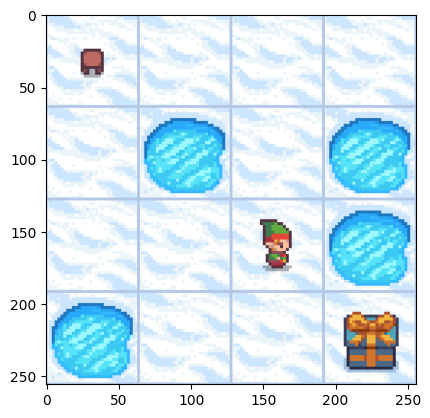

Enter the action as an integer from 0 to 4  (or exit): 
1
--> The result of taking action 1 is:
     S= 14
     R= 0.0
     p= {'prob': 1.0}


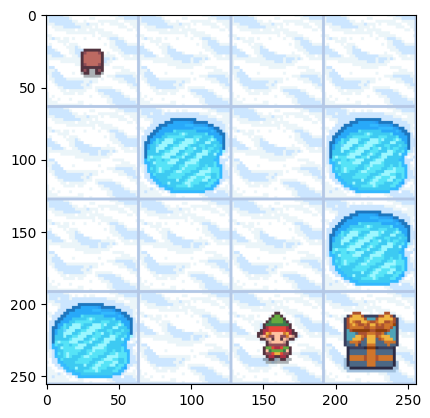

Enter the action as an integer from 0 to 4  (or exit): 
2
--> The result of taking action 2 is:
     S= 15
     R= 1.0
     p= {'prob': 1.0, 'TimeLimit.truncated': False}


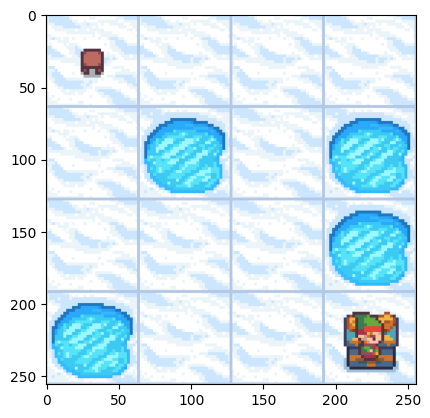

Enter the action as an integer from 0 to 4  (or exit): 
exit


<Figure size 640x480 with 0 Axes>

In [ ]:
# We can act as the agent, by selecting actions and stepping the environment
# through time to see its responses to our actions
env.reset()
exitCommand=False
while not(exitCommand):
  env.render()
  print("Enter the action as an integer from 0 to",env.action_space.n," (or exit): ")
  userInput=input()
  if userInput=="exit":
    break
  action=int(userInput)
  (observation, reward, compute, probability) = env.step(action)
  print("--> The result of taking action",action,"is:")
  print("     S=",observation)
  print("     R=",reward)
  print("     p=",probability)
  img = env.render()
  img = img[0]
  plt.imshow(img)
  plt.show(block=False)
  plt.pause(0.1)
  plt.clf()


In [ ]:
'''
Input Number:   0   1    2   3
Logic Action:  Left  Down  Right  Up

Symbol:      Stool            Ice Surface                Hole                 Gift               Cartoon Character
Meaning:  Starting Position   Safe Position(agent can walk on)   Wrong Position(leading to fail)   Target Position(to be reached)   Current Position(agent is in)

The objective of the agent is to reach the target position from the starting position without passing wrong positions / through safe positions.
'''

AI randomly chose action: 1
--> The result of taking action 1 is:
     S= 4
     R= 0.0
     p= {'prob': 1.0}


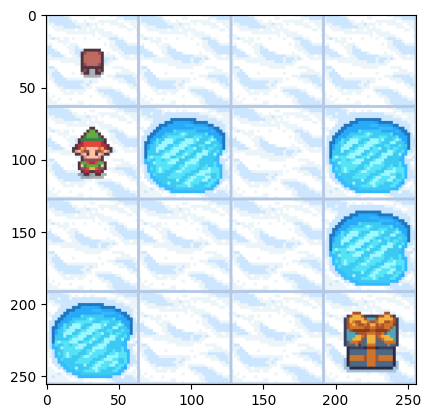

AI randomly chose action: 2
--> The result of taking action 2 is:
     S= 5
     R= 0.0
     p= {'prob': 1.0, 'TimeLimit.truncated': False}


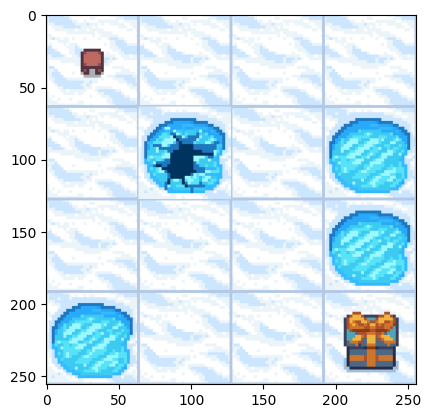

AI failed!


<Figure size 640x480 with 0 Axes>

In [ ]:
import random

env.reset()
exitCommand = False
while not exitCommand:
  env.render()
  action = random.randint(0, 3)
  print("AI randomly chose action:", action)
  (observation, reward, compute, probability) = env.step(action)
  print("--> The result of taking action",action,"is:")
  print("     S=",observation)
  print("     R=",reward)
  print("     p=",probability)
  img = env.render()
  img = img[0]
  plt.imshow(img)
  plt.show(block=False)
  plt.pause(0.1)
  plt.clf()
  # Termination condition
  if compute:
    if reward > 0:
      print("AI reached the target!")
    else:
      print("AI failed!")
    break

I choose to represent the agent's policy function and value function with numpy arrays.
Both have 16 elements (4x4), the former are integers between 0 and 3,
 and the latter are positive numbers between 0 and 1.

If I set the AI to make random action selections, it will return within 1 iteration with arbitrary policy function and value function to be all 0.
Perhaps that is because random selection can barely bring the agent to the target and thus value function cannot be updated.
If I modify action selection a little bit as shown below, it will take some iterations to converge and the value function will be updated.

Now that we have the policy evaluation function, we can improve policy above
by judging policy stability. According to policy improvement theorem,
we can generate new polict pi' that is always no worse than pi. So we just need to update the policy through iterations until convergence.

Usually, value iteration requires more iterations than policy iteration (like the results in "slippery" Frozen Lake), as the former oscillates to converge, while the latter converges monotonically. But here two methods take the same number of iterations (7) to converge. Perhaps that is because this is a rather easy task that both methods can solve quickly.

In [ ]:
# Policy Function
def policy_function(observation):
  '''
  The revised random action selection only takes action 1 or 2.
  When the agent cannot go down, it will go right, and vice versa.
  Otherwise it will go left or down randomly.
  '''
  return random.randint(0, 3)
  if observation % 4 == 3:
    return 1
  elif observation > 12:
    return 2
  else:
    return random.randint(1, 2)

import numpy as np

# C-4 Policy Evaluation - inplace
def C4_policy_evaluation(env, policy_function, theta=1e-5, gamma=0.9):
  policy, value = np.zeros(stateSpaceSize, dtype=int), np.zeros(stateSpaceSize)
  iteration = 0
  while True:
    delta = 0
    for state in range(stateSpaceSize):
      value_old = value[state]
      action = policy_function(state)
      policy[state] = action
      value_new = 0
      for prob, next_state, reward, done in env.P[state][action]:
        value_new += prob * (reward + gamma * value[next_state] * (not done))
      value[state] = value_new
      delta = max(delta, abs(value_old - value_new))
    iteration += 1
    if delta < theta:
      break
  return policy, value, iteration

env.reset()
env.render()
policy, value, iteration = C4_policy_evaluation(env, policy_function)
print('Policy function:', policy)
print('Value function:', value)
print('Iteration:', iteration)


Policy function: [0 0 3 3 3 3 1 0 2 3 3 1 2 3 3 1]
Value function: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Iteration: 1


In [ ]:
# Policy Iteration
def policy_improvement(env, value, gamma=0.9):

  policy = np.zeros(stateSpaceSize, dtype=int)
  for state in range(stateSpaceSize):
    action_value = np.zeros(actionSpaceSize)
    for action in range(actionSpaceSize):
      for prob, next_state, reward, done in env.P[state][action]:
        action_value[action] += prob * (reward + gamma * value[next_state] * (not done))
    policy[state] = np.argmax(action_value)

  return policy

def policy_iteration(env, gamma=0.9, theta=1e-5):

  policy = np.random.choice(actionSpaceSize, size=stateSpaceSize)
  policy_step, eval_step = 0, 0
  while True:
    policy_step += 1
    _, value, step = C4_policy_evaluation(env, lambda s: policy[s], theta, gamma)
    eval_step += step
    policy_new = policy_improvement(env, value, gamma)
    if np.array_equal(policy, policy_new):
      break
    policy = policy_new

  return policy_step, eval_step, policy, value

env.reset()
env.render()
policy_step, eval_step, optimal_policy, optimal_value = policy_iteration(env)
print('Overall policy iteration step:', policy_step)
print('Evaluation step:', eval_step)
print('Optimal policy:', optimal_policy)
print('Optimal value function:', optimal_value)


Overall policy iteration step: 7
Evaluation step: 28
Optimal policy: [1 2 1 0 1 0 1 0 2 1 1 0 0 2 2 0]
Optimal value function: [0.59049 0.6561  0.729   0.6561  0.6561  0.      0.81    0.      0.729
 0.81    0.9     0.      0.      0.9     1.      0.     ]


In [ ]:
# Value Iteration
def value_iteration(env, gamma=0.9, theta=1e-5):

  value = np.zeros(stateSpaceSize)
  iteration = 0
  while True:
    iteration += 1
    delta = 0
    for state in range(stateSpaceSize):
      value_old = value[state]
      action_value = np.zeros(actionSpaceSize)
      for action in range(actionSpaceSize):
        for prob, next_state, reward, done in env.P[state][action]:
          action_value[action] += prob * (reward + gamma * value[next_state] * (not done))
      value[state] = np.max(action_value)
      delta = max(delta, abs(value_old - value[state]))
    if delta < theta:
      break

  # Extract the optimal policy from the converged value function
  policy = np.zeros(stateSpaceSize, dtype=int)
  for state in range(stateSpaceSize):
    action_value = np.zeros(actionSpaceSize)
    for action in range(actionSpaceSize):
      for prob, next_state, reward, done in env.P[state][action]:
        action_value[action] += prob * (reward + gamma * value[next_state] * (not done))
    policy[state] = np.argmax(action_value)

  return iteration, policy, value

env.reset()
env.render()
iteration, optimal_policy, optimal_value = value_iteration(env)
print('Iteration count:', iteration)
print('Optimal Policy:', optimal_policy)
print('Optimal Value Function:', optimal_value)

Iteration count: 7
Optimal Policy: [1 2 1 0 1 0 1 0 2 1 1 0 0 2 2 0]
Optimal Value Function: [0.59049 0.6561  0.729   0.6561  0.6561  0.      0.81    0.      0.729
 0.81    0.9     0.      0.      0.9     1.      0.     ]


In [ ]:
# Slippery Frozen Lake
gym.envs.register(
    id='FrozenLakeSlippery-v0',
    entry_point='gym.envs.toy_text:FrozenLakeEnv',
    kwargs={'map_name' : '4x4', 'is_slippery': True},
    max_episode_steps=100,
    reward_threshold=0.74
)
env=gym.make('FrozenLakeSlippery-v0', render_mode='rgb_array')

In [ ]:
# Policy Iteration
env.reset()
env.render()
policy_step, eval_step, optimal_policy, optimal_value = policy_iteration(env)
print('Overall policy iteration step:', policy_step)
print('Evaluation step:', eval_step)
print('Optimal policy:', optimal_policy)
print('Optimal value function:', optimal_value)

Overall policy iteration step: 6
Evaluation step: 183
Optimal policy: [0 3 0 3 0 0 0 0 3 1 0 0 0 2 1 0]
Optimal value function: [0.06884375 0.06138024 0.07438826 0.05578403 0.09181842 0.
 0.11219872 0.         0.14541169 0.24748338 0.2996092  0.
 0.         0.37992721 0.63901606 0.        ]


In [ ]:
# Value Iteration
env.reset()
env.render()
iteration, optimal_policy, optimal_value = value_iteration(env)
print('Iteration count:', iteration)
print("Optimal Policy:", optimal_policy)
print("Optimal Value Function:", optimal_value)

Iteration count: 48
Optimal Policy: [0 3 0 3 0 0 0 0 3 1 0 0 0 2 1 0]
Optimal Value Function: [0.06884713 0.0613827  0.0743898  0.0557857  0.09182101 0.
 0.1121994  0.         0.14541346 0.24748435 0.2996098  0.
 0.         0.37992783 0.63901636 0.        ]
